<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
    FIT-HCMUS, VNU-HCM 
    <br>
    Lập trình cho khoa học dữ liệu 
    <br>
    Đồ án cuối kỳ 📌
</div>

<div style="text-align: center; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Khám phá và tiền xử lí dữ liệu 📌
</div>

## Thêm các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('../Project/Data/raw_data/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## 01. Khai phá dữ liệu (dòng, cột, kiểu dữ liệu):

Tập dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [3]:
print(f'Số dòng: {df.shape[0]}')
print(f'Số cột: {df.shape[1]}')

Số dòng: 48895
Số cột: 16


Ý nghĩa của từng dòng là gì
- Mỗi dòng trong tập dữ liệu đại diện cho thông tin của một danh sách airbnb cụ thể ở New York.

Có dòng nào bị trùng không?

In [4]:
print(df.duplicated().sum())

0


Ý nghĩa của từng cột?


| Column name     | Meaning |
| :---        |    :----   |
| id      | ID of the listing      |
| name   | The name of the listing        |
| host_id      | ID of the host      |
| host_name   | Name of the host        |
| neighbourhood_group      | The group of neighbourhood area around the listing       |
| neighbourhood   | The neighbourhood area around the listing          |
| latitude      | The latitude of place of listing (from the World Geodetic System(WGS84))       |
| longitude   |  The longtitude of place of listing (from the World Geodetic System(WGS84))       |
| room_type   | The type of room        |
| price      | The price of listing      |
| minimum_nights      | The minimum nights to order        |
| number_of_reviews   | The number of reviews for this listing        |
| last_review      | The date of latest reviews for this listing       |
| reviews_per_month   | The average number of reviews for this listing per month    |
| calculated_host_listings_count   | The number of listings the host has in the curent scrape       |
| availability_365   | The availability of the listing 365 days in the future as determined by the calendar       |


Loại dữ liệu hiện tại của mỗi cột là gì? Có cột nào có loại dữ liệu không phù hợp không?

In [5]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Để hiểu rõ hơn về các cột có loại dữ liệu 'object', ta sẽ chia chúng thành các kiểu con.

In [6]:
def open_object_col(col):
    return (set(col.apply(type)))

In [7]:
df.apply(open_object_col)

id                                                 {<class 'int'>}
name                              {<class 'float'>, <class 'str'>}
host_id                                            {<class 'int'>}
host_name                         {<class 'float'>, <class 'str'>}
neighbourhood_group                                {<class 'str'>}
neighbourhood                                      {<class 'str'>}
latitude                                         {<class 'float'>}
longitude                                        {<class 'float'>}
room_type                                          {<class 'str'>}
price                                              {<class 'int'>}
minimum_nights                                     {<class 'int'>}
number_of_reviews                                  {<class 'int'>}
last_review                       {<class 'float'>, <class 'str'>}
reviews_per_month                                {<class 'float'>}
calculated_host_listings_count                     {<class 'in

Các cột có kiểu dữ liệu phù hợp và không phù hợp:

- Column `id`, `host_id`, `neighbourhood_group`, `neighbourhood`, `latitude`,`longtitude`, `room_type`, `price`, `minimum_nights`, `number_of_reviews`,`review_per_month`, `calculated_host_listings_count` and `availability_365` có kiểu dữ liệu phù hợp.
- Column `name`, `host_name` cần được chuyển sang kiểu chuỗi.
- Column `last_review` cần được chuyển snag kiểu datetime.

## 02. Tiền xử lí dữ liệu:


Chuyển sang kiểu dữ liệu phù hợp:

In [8]:
df[['name', 'host_name']] = df[['name', 'host_name']].replace(to_replace=np.nan, value='')
df['last_review'] = pd.to_datetime(df['last_review'],format='%Y-%m-%d')

In [9]:
df.apply(open_object_col)

id                                                                  {<class 'int'>}
name                                                                {<class 'str'>}
host_id                                                             {<class 'int'>}
host_name                                                           {<class 'str'>}
neighbourhood_group                                                 {<class 'str'>}
neighbourhood                                                       {<class 'str'>}
latitude                                                          {<class 'float'>}
longitude                                                         {<class 'float'>}
room_type                                                           {<class 'str'>}
price                                                               {<class 'int'>}
minimum_nights                                                      {<class 'int'>}
number_of_reviews                                                   {<class 

Xử lí giá trị thiếu

In [10]:
def missing_percentile(col):
    return col.isnull().sum()/len(col)

In [11]:
df.apply(missing_percentile)

id                                0.000000
name                              0.000000
host_id                           0.000000
host_name                         0.000000
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.205583
reviews_per_month                 0.205583
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

- Hầu hết các cột số như giá, minumun_nights, number_of_reviews, Calculate_host_listings_count,available_365 đều không thiếu dữ liệu
- Tỷ lệ thiếu giá trị của review_per_month là khoảng 20%. Nguyên nhân là do có nhiều listing không có bất kỳ đánh giá nào.
- Giải pháp cho việc thiếu giá trị của review_per_month là điền dữ liệu bị thiếu bằng 0
- Về Last_reviews : thông tin của cột này không mang lại quá nhiều giá trị khi nó chỉ cung cấp ngày đánh giá mới nhất cho danh sách, và việc review này không mang tính bắt buộc nên cột này tùy vào từng người dùng nên nhóm em cũng không xác định được độ hot của từng listing. Vì vậy nhóm em sẽ bỏ cột này để dễ phân tích và đặt câu hỏi hơn

In [12]:
df['reviews_per_month'].fillna(0,inplace=True)
df.drop(['last_review'],axis='columns',inplace=True)

Xử lý các giá trị outlier

In [13]:
def count_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((col < (Q1 - 1.5 * IQR)) | (col > (Q3 + 1.5 * IQR)))
    return outliers.sum()

In [14]:
numerical_col = ['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
df[numerical_col].apply(count_outliers)

price                             2972
minimum_nights                    6607
number_of_reviews                 6021
reviews_per_month                 3312
calculated_host_listings_count    7081
availability_365                     0
dtype: int64

In [15]:
def find_limit(col) : 
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit  = (Q1 - 1.5 * IQR)
    upper_limit = (Q3 + 1.5 * IQR)
    return lower_limit,upper_limit

In [16]:
lower_limit_nights,upper_limit_nights = find_limit(df['minimum_nights'])
outliers_df_nights = df[(df['minimum_nights'] < lower_limit_nights) | (df['minimum_nights'] > upper_limit_nights)]['minimum_nights'].sort_values()
df = df[df['minimum_nights'] <= 366]

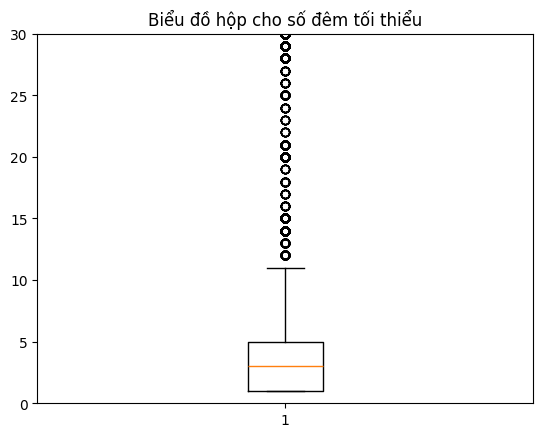

In [17]:
plt.boxplot(df['minimum_nights'])
plt.ylim(0,30)
plt.title('Biểu đồ hộp cho số đêm tối thiểu')
plt.show()

- Số đêm tối thiểu trung bình là 3, vì mục tiêu chính của Airbnb là dành cho khách du lịch ngắn hạn khoảng dưới 1 tuần, mục tiêu tiếp theo của Airbnb là những người đi công tác trong thời gian từ 3-6 tháng hoặc thấp hơn 1 năm .Số lượng người thuê Airbnb trên 1 năm thường rất ít vì trên 1 năm có nhiều lựa chọn như thuê căn hộ (hợp đồng thuê căn hộ thường từ 1 năm trở lên) . Vì vậy, một gợi ý để xử lý các giá trị ngoại lệ trong cột này là giá trị nào lớn hơn 1 năm sẽ bị loại bỏ.

In [18]:
lower_limit_price,upper_limit_price = find_limit(df['price'])
outliers_df_price = df[(df['price'] < lower_limit_price) | (df['price'] > upper_limit_price)]['price'].sort_values()
outliers_df_price

12262      335
10398      335
19462      335
46556      335
30330      335
         ...  
6530      9999
40433     9999
17692    10000
29238    10000
9151     10000
Name: price, Length: 2971, dtype: int64

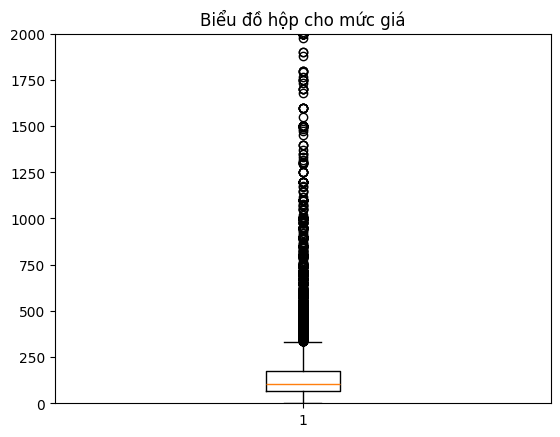

In [19]:
plt.boxplot(df['price'])
plt.ylim(0,2000)
plt.title('Biểu đồ hộp cho mức giá')
plt.show()

- Airbnb thường được lựa chọn bởi những người không có ngân sách lớn hoặc không muốn chi quá nhiều cho chỗ ở. Có thể giải thích lý do tại sao có rất nhiều Airbnb với mức phí cao mà thành phố New York là thành phố đắt đỏ và chi phí sinh hoạt ở thành phố cao dẫn đến số tiền chi cho các Airbnb cũng cao theo. Mức phí của từng Airbnb còn dựa trên vị trí, ngôi nhà dành cho Airbnb, nội thất trong Airbnb và thời gian Airbnb được rao.

In [20]:
lower_limit_host,upper_limit_host = find_limit(df['calculated_host_listings_count'])
outliers_df_host = df[(df['calculated_host_listings_count'] < lower_limit_host) | (df['calculated_host_listings_count'] > upper_limit_host)]['calculated_host_listings_count'].sort_values()
outliers_df_host

25859      4
40440      4
12770      4
12769      4
12758      4
        ... 
41447    327
41446    327
41445    327
44620    327
41477    327
Name: calculated_host_listings_count, Length: 7080, dtype: int64

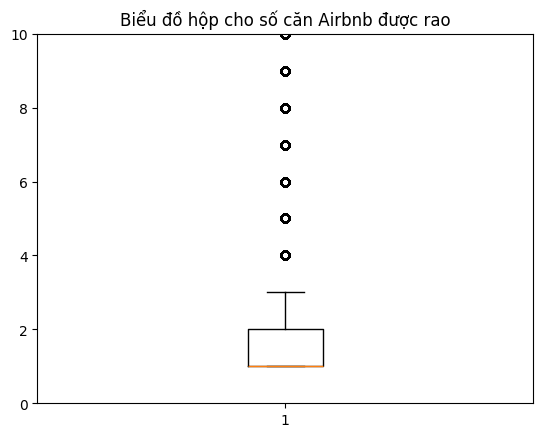

In [21]:
plt.boxplot(df['calculated_host_listings_count'])
plt.ylim(0,10)
plt.title('Biểu đồ hộp cho số căn Airbnb được rao')
plt.show()

- Số lượng danh sách trung bình là 1-2 danh sách cho mỗi chủ sở hữu và những người này được coi là chủ sở hữu cá nhân, thường có 1-2 phòng trống để thuê. Số lượng chủ nhà riêng lẻ này thường chiếm phần lớn trong Airbnb. Các ngoại lệ ở đây là chủ doanh nghiệp hoặc những người kinh doanh quy mô lớn và thường kinh doanh theo hình thức chuỗi các Airbnb. Chúng ta không nên loại bỏ các ngoại lệ trong cột này vì nó có thể cung cấp thông tin chi tiết về sự khác biệt giữa giá của chủ sở hữu cá nhân và chủ doanh nghiệp

Lưu dữ liệu vào file csv


In [22]:
df.to_csv('./Data/processed_data/processed_data.csv', index=False)

## 03. Khám phá dữ liệu (phân bổ dữ liệu):

### Dữ liệu dạng số

In [23]:
numerical_col = ['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']

Phân tích giá

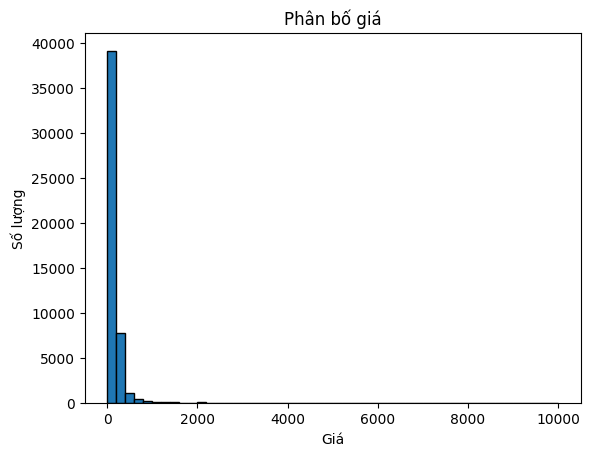

In [24]:
plt.hist(df['price'],bins=50,edgecolor='black')
plt.xlabel('Giá')
plt.ylabel('Số lượng')
plt.title('Phân bố giá')
plt.show()

In [25]:
print(f"Giá tiền thấp nhất cho việc thuê 1 căn Airbnb là {df['price'].min()}")
print(f"Giá tiền trung bình cho việc thuê 1 căn Airbnb là {df['price'].mean()}")

Giá tiền thấp nhất cho việc thuê 1 căn Airbnb là 0
Giá tiền trung bình cho việc thuê 1 căn Airbnb là 152.7270160795385


- Mức giá thấp nhất cho 1 căn Airbnb là 0 , đây có thể là do chủ căn Airbnb muốn đặt ra mức giá này vì 1 vài nguyên do như làm từ thiện , quyên góp tiền ủng hộ người nghèo ,.. thường tùy vào thời điểm đăng tin , nhưng không loại trừ trường hợp chủ nhà rao nhầm giá 
- Mức giá trung bình là 152 , đây cũng là số tiền không quá lớn nếu để thuê 1 căn Airbnb ở New York 

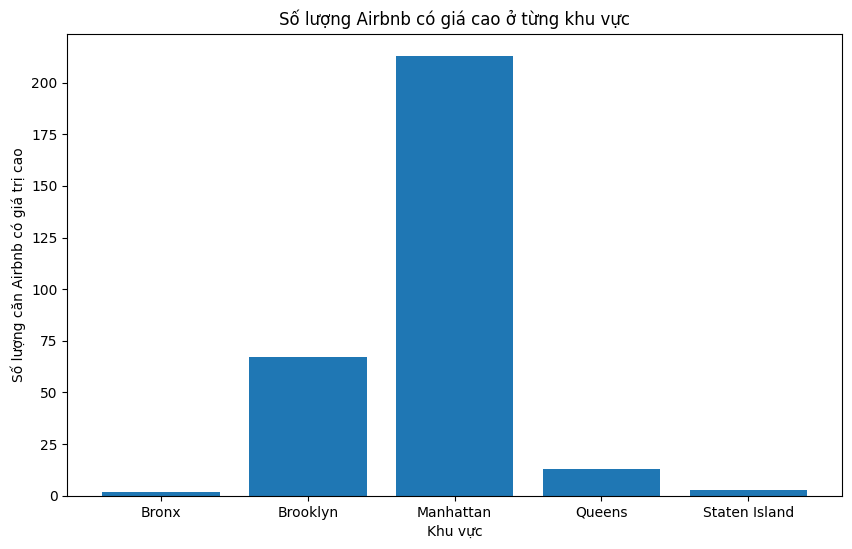

In [26]:
max_price_df = df[df['price'] >=1000]
grouped_df = max_price_df.groupby('neighbourhood_group')['price'].count().reset_index()

# Plotting bar chart
plt.figure(figsize=(10, 6))
plt.bar(grouped_df['neighbourhood_group'], grouped_df['price'])
plt.xlabel('Khu vực')
plt.ylabel('Số lượng căn Airbnb có giá trị cao')
plt.title('Số lượng Airbnb có giá cao ở từng khu vực')
plt.show()

- Manhattan là khu vực đắt đỏ nhất với số lượng căn Airbnb trên 100 là hơn 200 căn, tiếp đến là Brooklyn với gần 70 căn còn lại Queens, State Island ,Bronx có lượng căn Airbnb khá thấp cho thấy mức độ bình dân hơn đôi chút so với Manhattan

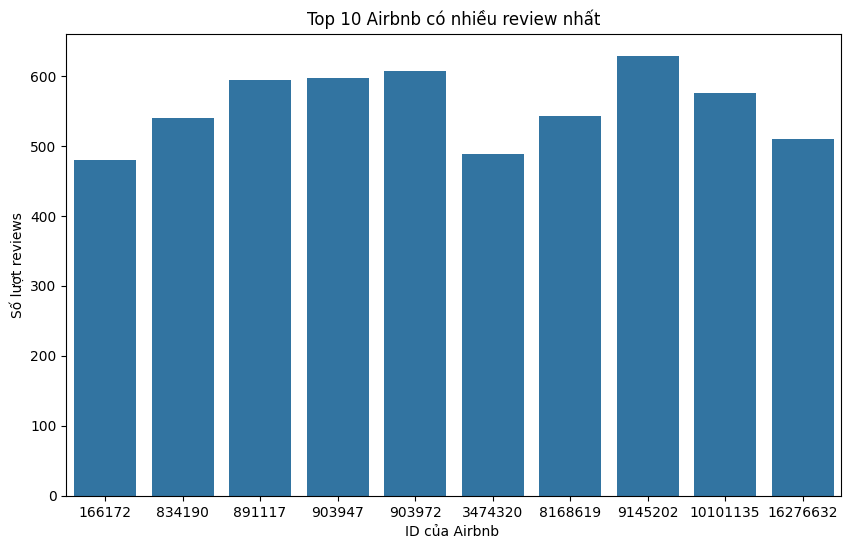

In [27]:
top_nights_df = df.sort_values(by='number_of_reviews', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_nights_df['id'],y=top_nights_df['number_of_reviews'])
plt.xlabel('ID của Airbnb ')
plt.ylabel('Số lượt reviews')
plt.title('Top 10 Airbnb có nhiều review nhất')
plt.show()



- Đây là top 10 những căn Airbnb được nhiều review nhất , có thể đến từ việc các Airbnb này đã hoạt động lâu năm và đã có lượng khác ổn định

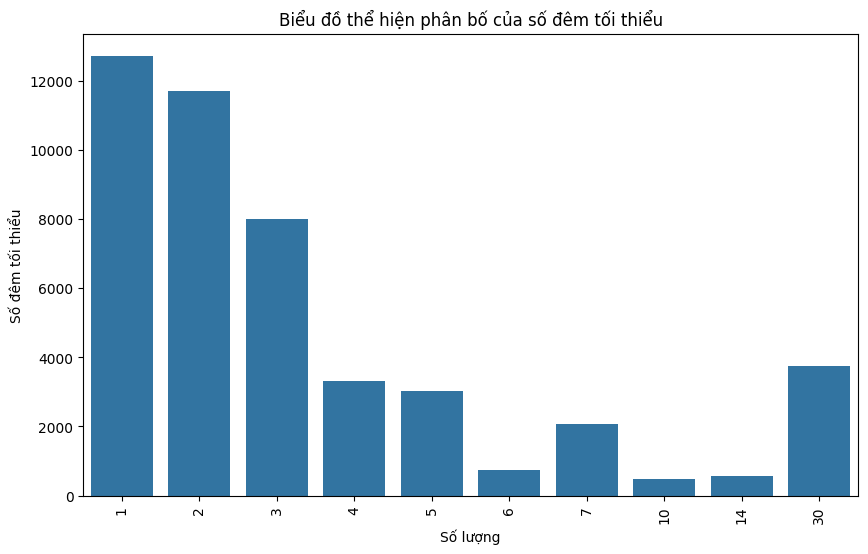

In [28]:
top_10_host=df['minimum_nights'].value_counts().head(10)
top_host_df=pd.DataFrame(top_10_host)
top_host_df.reset_index(inplace=True)
plt.figure(figsize=(10, 6))
sns.barplot(x="minimum_nights", y="count", data=top_host_df)
plt.xticks(rotation = 90)
plt.ylabel('Số đêm tối thiểu')
plt.xlabel('Số lượng')
plt.title('Biểu đồ thể hiện phân bố của số đêm tối thiểu')
plt.show()

- Số đêm tối thiếu mà các Airbnb yêu thường trong vòng dưới 1 tuần hay 1-2 ngày là chủ yếu và thường là sẽ dưới 1 tháng . Điều này phù hợp với việc khách hàng thường không ở quá lâu khi thuê 1 căn Airbnb với mục đích chính là đi du lịch 

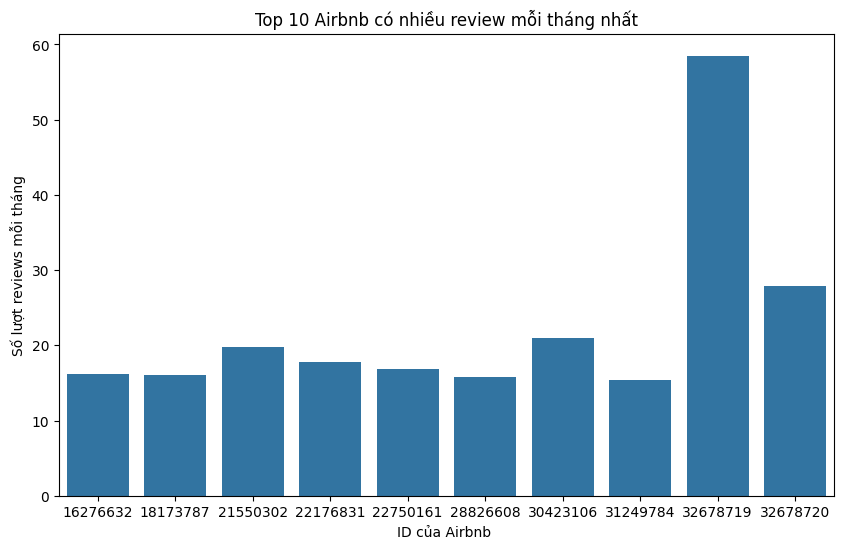

In [29]:
top_rv_month_df = df.sort_values(by='reviews_per_month', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_rv_month_df['id'],y=top_rv_month_df['reviews_per_month'])
plt.xlabel('ID của Airbnb ')
plt.ylabel('Số lượt reviews mỗi tháng')
plt.title('Top 10 Airbnb có nhiều review mỗi tháng nhất')
plt.show()


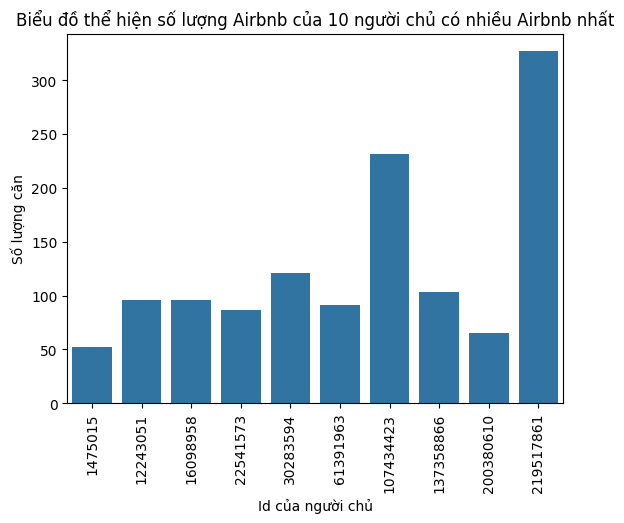

In [30]:
top_10_host=df['host_id'].value_counts().head(10)
top_host_df=pd.DataFrame(top_10_host)
top_host_df.reset_index(inplace=True)

sns.barplot(x="host_id", y="count", data=top_host_df)
plt.xticks(rotation = 90)
plt.ylabel('Số lượng căn')
plt.xlabel('Id của người chủ')
plt.title('Biểu đồ thể hiện số lượng Airbnb của 10 người chủ có nhiều Airbnb nhất')
plt.show()

### Dữ liệu loại Categorical

In [31]:
df.select_dtypes(include='object').columns

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type'],
      dtype='object')

In [32]:
cate_col = ['neighbourhood_group', 'neighbourhood','room_type']

#### Phân tích neighbourhood_group


In [33]:
neighbourhood_group_df = df['neighbourhood_group']
neighbourhood_group_df.to_frame()

,neighbourhood_group
0,Brooklyn
1,Manhattan
2,Manhattan
3,Brooklyn
4,Manhattan
...,...
48890,Brooklyn
48891,Brooklyn
48892,Manhattan
48893,Manhattan


In [34]:
neighbourhood_group_count = neighbourhood_group_df.value_counts()
neighbourhood_group_count

neighbourhood_group
Manhattan        21656
Brooklyn         20098
Queens            5664
Bronx             1091
Staten Island      373
Name: count, dtype: int64

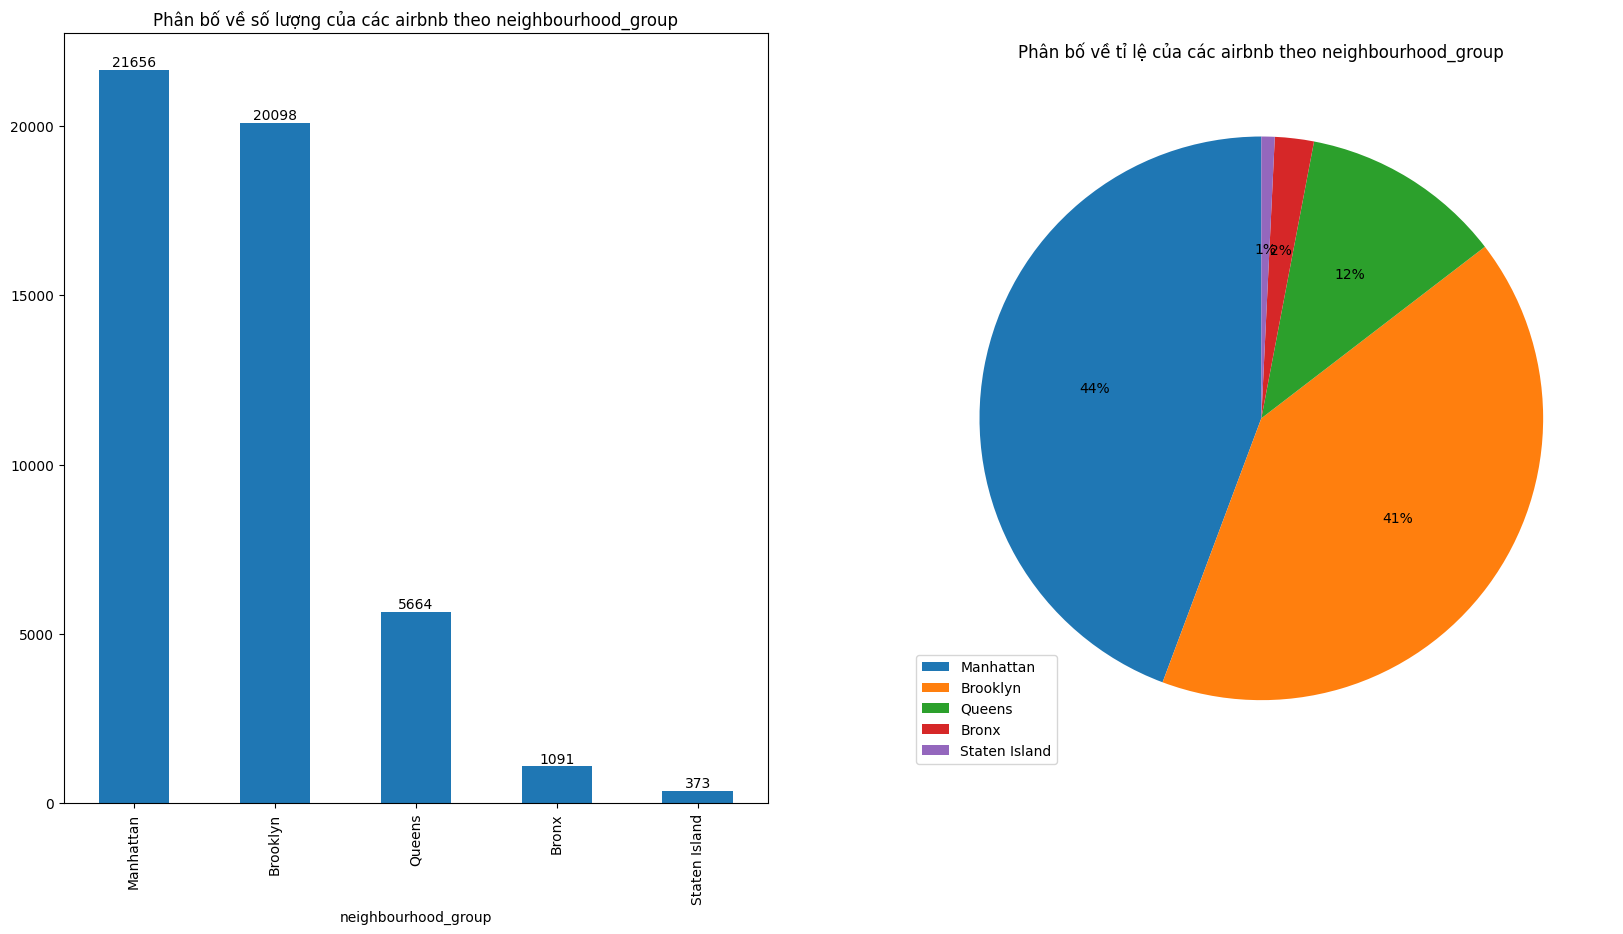

In [35]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
neighbourhood_group_count.plot(kind='bar', ax=ax[0])
ax[0].bar_label(ax[0].containers[0])
ax[0].set_title('Phân bố về số lượng của các airbnb theo neighbourhood_group')

neighbourhood_group_count.plot(kind='pie', ax=ax[1], autopct='%1.f%%', startangle=90, labels=None)
ax[1].legend(labels=neighbourhood_group_count.index, loc=3)
ax[1].set_ylabel(None)
ax[1].set_title('Phân bố về tỉ lệ của các airbnb theo neighbourhood_group')
plt.show()

- Có thể thấy rằng có tổng cộng 5 nhóm khu vực.
- Trong đó, Manhattan chiếm tỷ lệ cao nhất (44% tổng danh sách Airbnb), tiếp theo là Brooklyn (41%), cuối cùng là Queens (12%), Bronx (2%), và Staten Island (1%).
- Có thể thấy rằng các danh sách Airbnb tại New York City chủ yếu tập trung ở hai khu vực: Manhattan và Brooklyn.

#### Phân tích neighbourhood


In [36]:
neighbourhood_df = df['neighbourhood']
neighbourhood_df.to_frame()

,neighbourhood
0,Kensington
1,Midtown
2,Harlem
3,Clinton Hill
4,East Harlem
...,...
48890,Bedford-Stuyvesant
48891,Bushwick
48892,Harlem
48893,Hell's Kitchen


In [37]:
neighbourhood_count = neighbourhood_df.value_counts()
neighbourhood_count

neighbourhood
Williamsburg          3918
Bedford-Stuyvesant    3713
Harlem                2656
Bushwick              2464
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

In [38]:
neighbourhood_count.describe()

count     221.000000
mean      221.185520
std       535.990398
min         1.000000
25%        10.000000
50%        32.000000
75%       154.000000
max      3918.000000
Name: count, dtype: float64

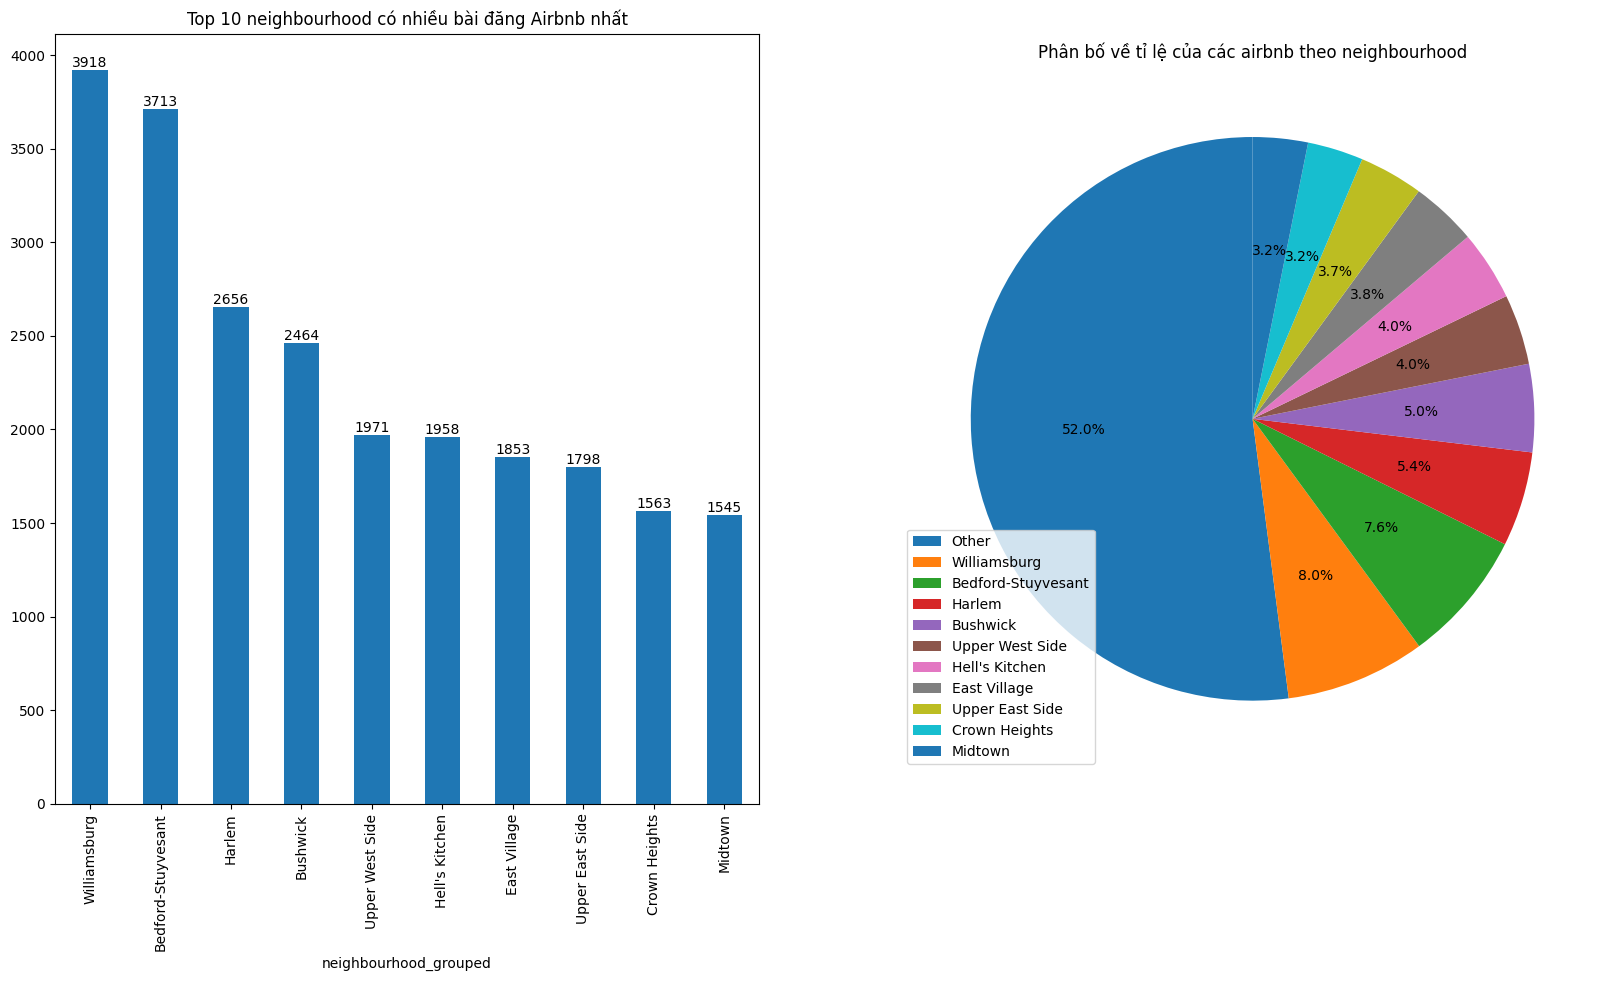

In [39]:
top_neighbourhoods = neighbourhood_df.value_counts().nlargest(10).index.tolist()

df['neighbourhood_grouped'] = df['neighbourhood'].apply(lambda x: x if x in top_neighbourhoods else 'Other')

grouped_neighbourhood_count = df['neighbourhood_grouped'].value_counts()
grouped_neighbourhood_count
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

grouped_neighbourhood_count[1:].plot(kind='bar', ax=ax[0])
ax[0].bar_label(ax[0].containers[0])
ax[0].set_title('Top 10 neighbourhood có nhiều bài đăng Airbnb nhất')

grouped_neighbourhood_count.plot(kind='pie', ax=ax[1], autopct='%1.1f%%', startangle=90, labels= None)
ax[1].legend(grouped_neighbourhood_count.index, loc=3)
ax[1].set_ylabel(None)
ax[1].set_title('Phân bố về tỉ lệ của các airbnb theo neighbourhood')

plt.show()

- Có thể thấy rằng có tổng cộng 221 giá trị khác nhau cho các khu vực.
- Trong số đó, khu vực có số lượng danh sách Airbnb cao nhất là Williamsburg, với 3918 danh sách (chiếm 8%). Khu vực này có số lượng bài đăng airbnb tương đối cao, vì dữ liệu chỉ ra rằng 75% các khu vực có ít hơn 155 danh sách Airbnb.

#### Phân tích room_type

In [40]:
room_type_df = df['room_type']
room_type_df.to_frame()

,room_type
0,Private room
1,Entire home/apt
2,Private room
3,Entire home/apt
4,Entire home/apt
...,...
48890,Private room
48891,Private room
48892,Entire home/apt
48893,Shared room


In [41]:
room_type_count = room_type_df.value_counts()
room_type_count

room_type
Entire home/apt    25401
Private room       22322
Shared room         1159
Name: count, dtype: int64

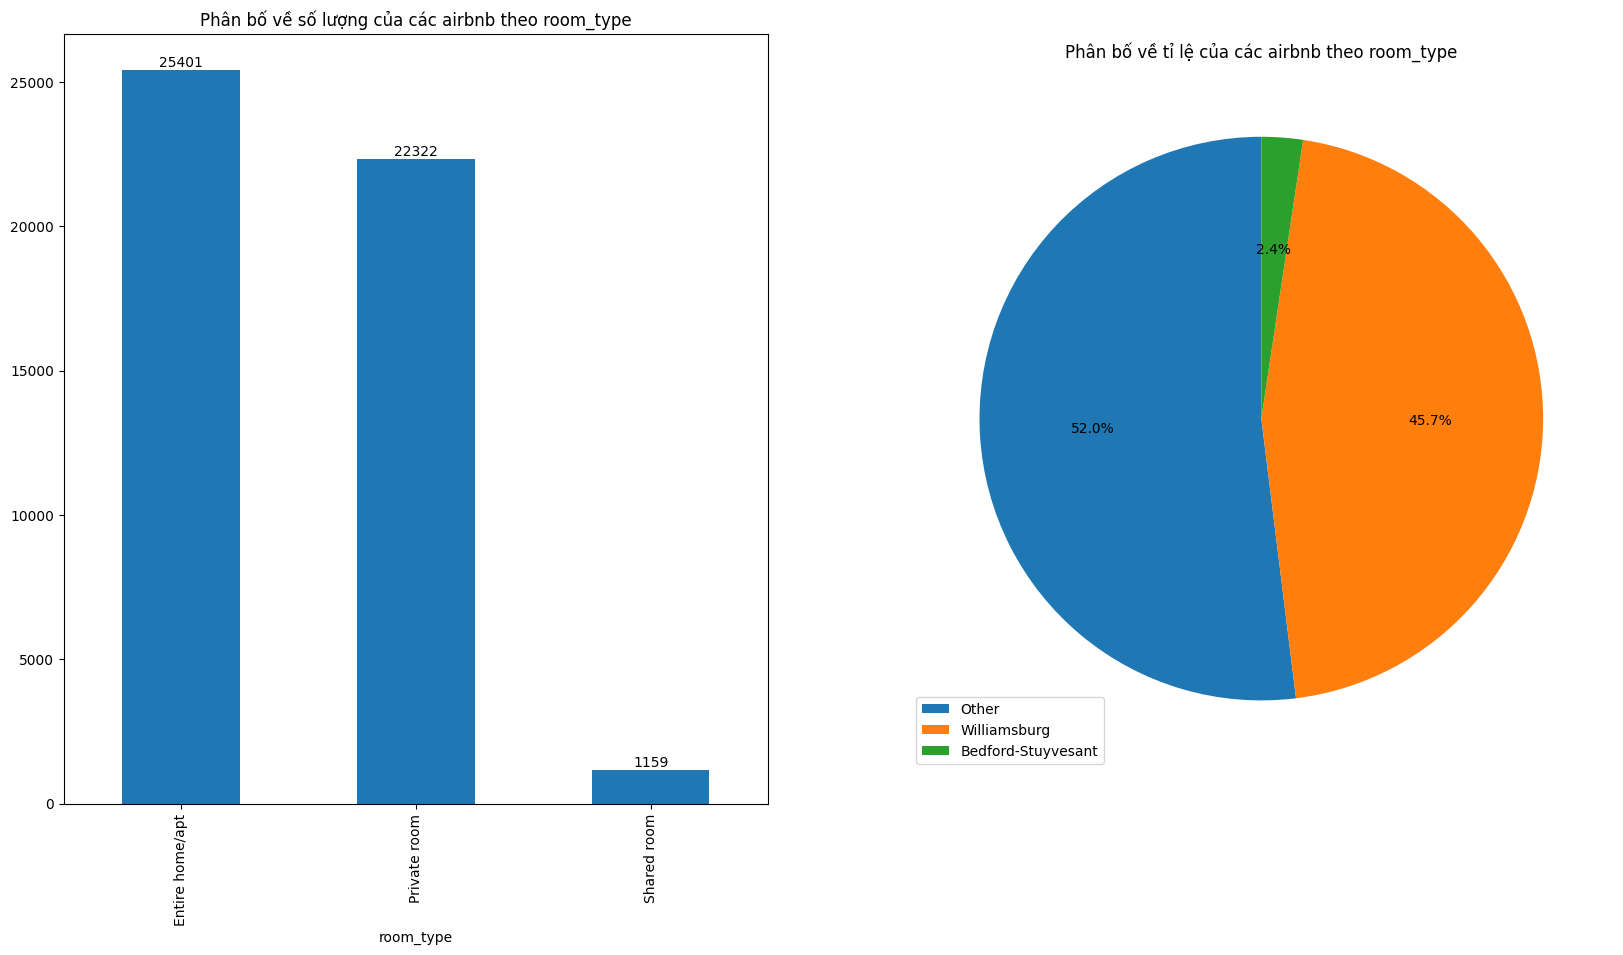

In [42]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
room_type_count.plot(kind='bar', ax=ax[0])
ax[0].bar_label(ax[0].containers[0])
ax[0].set_title('Phân bố về số lượng của các airbnb theo room_type')

room_type_count.plot(kind='pie', ax=ax[1], autopct='%1.1f%%', startangle=90, labels= None)
ax[1].legend(grouped_neighbourhood_count.index, loc=3)
ax[1].set_ylabel(None)
ax[1].set_title('Proportion of Airbnb Listings by Room Type')
ax[1].set_title('Phân bố về tỉ lệ của các airbnb theo room_type')
plt.show()

- Có thể thấy, các danh sách Airbnb tại New York City thuộc ba loại phòng: Toàn bộ nhà/căn hộ (Entire home/apt), Phòng riêng (Private room), và Phòng chung (Shared room).
- Trong số này, loại Entire home/apt là loại phổ biến nhất (chiếm 52% tổng số với 25401 danh sách), tiếp theo là Private room (chiếm 45,7% với 22322 danh sách), và cuối cùng là Shared room (chiếm 2,4% với 1159 danh sách).
- Có thể thấy rằng loại phòng Shared room tương đối ít phổ biến trong số các danh sách Airbnb tại New York City.